In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
import illustris_python as il

In [7]:
basePath = '/Users/forero/illustris-3/'

In [8]:
halos = il.groupcat.loadHalos(basePath,135)
subhalos = il.groupcat.loadSubhalos(basePath,135)

In [9]:
print halos.keys()
print subhalos.keys()

[u'Group_M_Crit200', u'Group_R_Mean200', u'GroupMass', u'Group_M_Mean200', u'GroupStarMetallicity', u'GroupVel', u'GroupBHMass', u'GroupMassType', u'Group_R_Crit200', u'GroupFirstSub', u'GroupSFR', u'GroupPos', u'Group_M_TopHat200', u'Group_M_Crit500', u'GroupCM', u'Group_R_Crit500', u'GroupNsubs', u'GroupLenType', u'GroupGasMetallicity', 'count', u'GroupBHMdot', u'GroupWindMass', u'Group_R_TopHat200', u'GroupLen']
[u'SubhaloPos', u'SubhaloBHMdot', u'SubhaloVmax', u'SubhaloWindMass', u'SubhaloGasMetallicityMaxRad', u'SubhaloVelDisp', u'SubhaloSFR', u'SubhaloStarMetallicityMaxRad', u'SubhaloLen', u'SubhaloSFRinHalfRad', u'SubhaloStellarPhotometrics', u'SubhaloGasMetallicity', u'SubhaloBHMass', u'SubhaloIDMostbound', u'SubhaloMassType', u'SubhaloStellarPhotometricsMassInRad', u'SubhaloHalfmassRad', u'SubhaloParent', u'SubhaloSpin', u'SubhaloStarMetallicityHalfRad', u'SubhaloVel', u'SubhaloLenType', u'SubhaloGasMetallicitySfrWeighted', u'SubhaloGasMetallicityHalfRad', u'SubhaloMassInRad',

In [10]:
#mases are: Gas, DM, unused, tracers, stars+wind particles, black holes
halo_masses = halos['GroupMassType']
halo_M_crit200 = halos['Group_M_Mean200']
print shape(halo_masses)
print min(halo_masses[:,1])

(131727, 6)
0.0282174


In [11]:
#Eight bands: U, B, V, K, g, r, i, z. Magnitudes based on the summed-up luminosities of all the stellar particles.
subhalo_mags = subhalos['SubhaloStellarPhotometrics']
print subhalo_mags[0]
#Index into the Group table of the FOF host/parent of this Subhalo. 
subhalo_grnr = subhalos['SubhaloGrNr']

[-23.66972542 -24.06076431 -24.91646004 -27.84368134 -24.5111351
 -25.25495529 -25.61162567 -25.86482811]


In [12]:
#MW mass range
index_MW = where((halo_M_crit200>50.0) & (halo_M_crit200<500.0))
index_MW = index_MW[0]
n_MW = size(index_MW)
print n_MW

2496


In [76]:
FOF_MW_pos = halos['GroupPos'][index_MW]
FOF_MW_vel = halos['GroupVel'][index_MW]
FOF_MW_FOFID = index_MW

In [77]:
out = open("../data/MW_FOF_candidates.dat", "w")
out.write("#FOFID pos_x pos_y pos_z vel_x vel_y vel_z\n")
out.write("#integer kpc/h kpc/h kpc/h km/s km/s km/s \n")

for i in range(n_MW):
    out.write("%d %f %f %f %f %f %f\n"%(FOF_MW_FOFID[i], FOF_MW_pos[i,0], FOF_MW_pos[i,1], FOF_MW_pos[i,2], 
                      FOF_MW_vel[i,0], FOF_MW_vel[i,1], FOF_MW_vel[i,2]))
out.close()

In [82]:
#pad boxes around to mock periodic boundary conditions
FOF_MW_pad_pos = FOF_MW_pos.copy()
l_box = 75000.0
for i in (-1,0,1):
    for j in (-1,0,1):
        for k in (-1,0,1):
            new_pos = FOF_MW_pos.copy()
            if(i):
                new_pos[:,0] = new_pos[:,0] + i*l_box
            if(j):
                new_pos[:,1] = new_pos[:,1] + j*l_box
            if(k):
                new_pos[:,2] = new_pos[:,2] + k*l_box
                
            FOF_MW_pad_pos = append(FOF_MW_pad_pos, new_pos, axis=0)

In [83]:
print FOF_MW_pad_pos[-1,:]
print FOF_MW_pos[-1,:]+75000

[  92183.21875   135392.546875  146386.8125  ]
[  92183.21484375  135392.546875    146386.8046875 ]


In [ ]:
n_pad_MW = size(FOF_MW_pad_pos[:,0])
diff = FOF_MW_pad_pos.reshape(n_pad_MW,1,3) - FOF_MW_pad_pos
D = (diff**2).sum(2)
i = range(n_pad_MW)
D[i,i] = inf
i = argmin(D,1)

In [ ]:
print D[:3][:3]

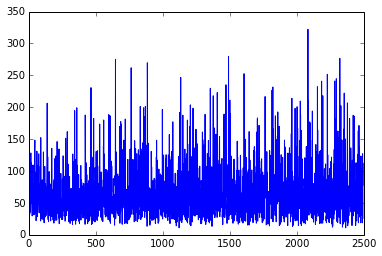

In [59]:
plot(sqrt(amin(D,1)/1000))

In [44]:
print where(corr==0)

(array([ 0, 87]),)
